In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
clients = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/ads_clients_data.csv')

In [4]:
clients

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [5]:
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/ads_data.csv')

In [6]:
dataЫ

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0.0,1955269.0
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0.0,232011.0
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0.0,4410.0
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0.0,62711.0
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0.0,1183501.0
...,...,...,...,...,...,...,...,...,...,...,...
103885,2019-04-02,2019-04-02 15:56:54,view,android,46923,44583,46923,CPM,211.4,0.0,1073308.0
103886,2019-04-02,2019-04-02 15:56:54,view,ios,113912,113807,113912,CPC,48.3,0.0,512090.0
103887,2019-04-02,2019-04-02 15:56:54,view,web,113912,113807,113912,CPC,48.3,0.0,512090.0
103888,2019-04-02,2019-04-02 15:56:54,view,ios,116158,116092,116158,CPM,208.5,0.0,46707392.0


In [7]:
means = data \
    .groupby(['ad_id','event'], as_index=False) \
    .agg({'client_union_id': 'count'}) \
    .pivot(index='ad_id',columns='event', values='client_union_id') \
    .reset_index() \
    .fillna(0)

In [8]:
means

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,2064,0.0,15.0
3,2132,0.0,6.0
4,2494,1.0,186.0
...,...,...,...
586,121896,0.0,27.0
587,121964,0.0,10.0
588,122004,4.0,100.0
589,122013,0.0,21.0


In [9]:
means

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,2064,0.0,15.0
3,2132,0.0,6.0
4,2494,1.0,186.0
...,...,...,...
586,121896,0.0,27.0
587,121964,0.0,10.0
588,122004,4.0,100.0
589,122013,0.0,21.0


/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: cannot convert float infinity to integer

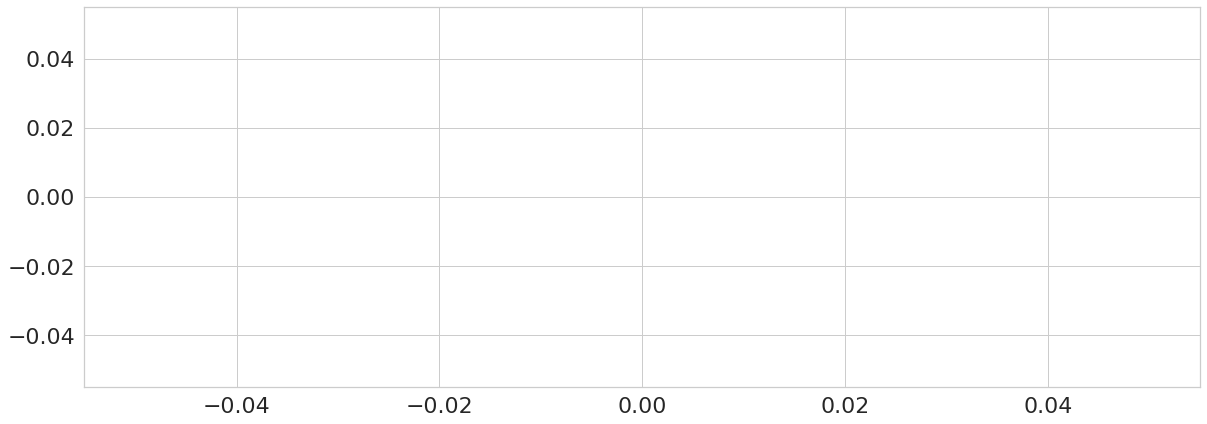

In [10]:
import numpy as np
import matplotlib.pyplot as plt
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
means["view"] = means["view"].fillna(0)
means["log_view"] = np.log(means.view)
sns.distplot(means.log_view)

In [ ]:
data

In [11]:
df1 = data.query('event == "view" ') \
.groupby(['ad_id', 'date'], as_index = False) \
.agg({'event' : 'count'}) \
.groupby('date', as_index = False) \
.agg({'event':'mean'})
df1

,date,event
0,2019-04-01,154.482270
1,2019-04-02,95.511834
2,2019-04-05,197.669355


In [12]:
data.date.unique()

array(['2019-04-01', '2019-04-02', '2019-04-05'], dtype=object)